{'li_msd/mon_300_li.txt': 7.188144380887247e-13, 'li_msd/mon_500_li.txt': 1.631182029786682e-10, 'li_msd/mon_600_li.txt': 6.136184807565457e-10, 'li_msd/mon_400_li.txt': 1.149531906580924e-11}
{'li_msd/mon_300_li.txt': 0.0016136712852974193, 'li_msd/mon_500_li.txt': 0.21971107950130223, 'li_msd/mon_600_li.txt': 0.6887580925318344, 'li_msd/mon_400_li.txt': 0.01935443833858277}


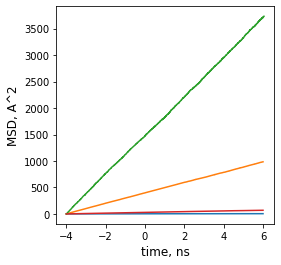

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import glob

################## Put in parameters! ##################

d = 3 # Dimensionality of ion transport
charge = 1 # Charge of ion
conc = 1.510 * 10**(28) # Concentration of ion
haven = 2.4 # Haven ratio to account for correlation

########################################################

files = glob.glob('li_msd/*li.txt')

diffusion_dict = {}
conductivity_dict = {}
conductivity_t_dict = {}

def plot_msd(msd_file):  

    # Import MSD files as lists:
    step, msd = np.loadtxt(msd_file, skiprows=2, unpack=True)
    
    # Find T:
    TT = msd_file[11:]
    T = float(TT[:3])
    
    # Convert to nanoseconds:
    steps = (step / 1000000)-10.05
    
    # Remove initial jump:
    msd = msd - msd[1]

    # Plot MSD:   
    plt.plot(steps[1:], msd[1:])
    
    # Find diffusion coefficient:
    slope, intercept = np.polyfit(steps, msd, 1)
    dc = (slope * (10 ** (-11))) / (2*d)
    diffusion_dict[msd_file] = dc
    
        # Diffusion coefficient = d(msd)/d(t) / 2d
        #
        # unit conversion: A^2 to m^2 is 10**-20; ns to s is 10**9, so unit conversion is 10**-11
    
    # Find conductivity:
    cond = (((charge * 1.602 * 10**(-19))**2 * conc * dc * haven)/((1.381 * 10**(-23)) * T) * 10**(-2))
    conductivity_dict[msd_file] = cond
    conductivity_t_dict[msd_file] = cond * T
    
        # Conversion of diffusion coefficient to conductivity as follows:
        #
        # conducitivity = (charge**2 * charge carrier concentration * diffusion coefficient) / boltzmann constant * temperature
        #
        # charge is electron charge (sodium singularly charged), so 1.602 * 10**(-19) C
        #
        # charge carrier concentration calculated as number of Li/Sc/Cl ions in the simulation cell/cell dimensions
        #
        # diffusion coefficient calcualted as above fromm MSD plot slopes
        #
        # boltzmann constant = 1.381 * 10**(-23) J/K
        #
        # temperature varies with experiment
        #
        # !!! 10**(-2) added to get final results in S/cm as conventionally displayed
    

for f in files:
    plot_msd(f)
    
plt.xlabel('time, ns', size = 12)
plt.ylabel('MSD, A^2', size = 12)

print(diffusion_dict)
print(conductivity_dict)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

#plt.savefig('msd_red.jpg', bbox_inches='tight', dpi=500)

In [15]:
step, msd = np.loadtxt('li_msd/mon_600_li.txt', skiprows=2, unpack=True)
f = open('li_msd/mon_600_li_2.txt', 'w')

f.write('# Time-averaged data for fix lithiummsdt \n# TimeStep c_lithiummsd[4] \n')

for s, m in zip(step[5950:], msd[5950:]):
    updated_msd = m - msd[5950]
    f.write(f'{s} {updated_msd}\n')

In [11]:
counter = 0

for s in step:
    if s == 6050000:
        print(counter)
    else:
        counter = counter + 1

5950


In [39]:
e[:3]

'300'